*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Assessment 5 : Big Data Analytics using Machine Learning
## Due Feburary 25th, 5pm (Firm)
### Total points: 100 ( weighted over 35)

This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML! 

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries 
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

In [ ]:
!pip3 install pandas==1.0.5

In [1]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__ == '1.0.5')

False


In [2]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import random

In [ ]:
#pip install --upgrade google-api-python-client

In [ ]:
#pip install google

In [ ]:
pip install google-colab

In [ ]:
pip install pycountry

In [ ]:
import pycountry

Import your dataset using the following cells for the Youtube videos

In [ ]:
from google.colab import files
uploaded = files.upload()

!unzip youtube_data.zip

# Section 5.1. : Machine Learning with Sklearn (45 points)

## 5.1.1 Data loading and Preprocessing (5 pts)

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 5.1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [3]:
# Import all the csv files
files = [i for i in glob.glob('youtube_data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
    df = pd.read_csv(csv)
    df['country'] = csv.replace('youtube_data','').replace('videos.csv','').replace('/','')
    all_dataframes.append(df)

#print(len(files)) 
#print(len(all_dataframes))    
#for df in all_dataframes:
#    print(df.head(5))

combined_data = pd.concat(all_dataframes)
combined_data.set_index('video_id',inplace=True)
combined_data.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN


#### 5.1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [49]:
combined_data['category_id'] = combined_data['category_id'].astype(str)

files = [i for i in glob.glob('youtube_data/*category_id.json'.format('json'))]
sorted(files)

json_dataframe = pd.DataFrame(columns = ["id", "snippet"], index=["id"])

for jsonfile in files:
    jsonDict = {}
    with open(jsonfile) as file:
          jsonDict = json.load(file)
    country = jsonfile.replace('youtube_data','').replace('category_id.json','').replace('/','').replace('_','')
    for obj in jsonDict['items']:
        json_dataframe.loc[len(json_dataframe.index)] = [obj['id'], obj['snippet']['title']]  

#category_series = pd.Series([] ,dtype=str) 
json_dataframe.dropna(inplace=True)
json_dataframe.drop_duplicates(keep='first',inplace=True)
#json_dataframe.set_index(['id'],inplace=True)
json_dataframe.id.astype(int)
json_dataframe.head(5)

,id,snippet
1,1,Film & Animation
2,2,Autos & Vehicles
3,10,Music
4,15,Pets & Animals
5,17,Sports


In [57]:
def lookup_catergory(x):
    value = json_dataframe[json_dataframe['id'] == x]['snippet']
    return value.iloc[0] if len(value) == 1 else x
combined_data['category'] = combined_data['category_id'].apply(lookup_catergory)
combined_data['category']

video_id
kzwfHumJyYc    Film & Animation
zUZ1z7FwLc8     News & Politics
10L1hZ9qa58       Entertainment
N1vE8iiEg64              Comedy
kJzGH0PVQHQ       Entertainment
                     ...       
BZt0qjTWNhw      Pets & Animals
1h7KV2sjUWY      People & Blogs
D6Oy4LfoqsU       Entertainment
oV0zkMe1K8s    Film & Animation
ooyjaVdt-jA              Gaming
Name: category, Length: 159906, dtype: object

In [5]:
combined_data.isnull().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               5339
country                      0
dtype: int64

#### 5.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [4]:
# Add code here
combined_data['trending_date'] = pd.to_datetime(combined_data['trending_date'], format="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time'], errors='coerce')

# Add your Code here to remove NA's
combined_data.dropna(subset=['trending_date'], how='all', inplace=True)
combined_data.dropna(subset=['publish_time'], how='all', inplace=True)

print(combined_data.isnull().sum())
combined_data.head(5)

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               5339
country                      0
dtype: int64


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN


In [6]:
# print
print('validate_na',(combined_data.shape))

validate_na (159906, 16)


## 5.2 Exploratory Data Analysis & Feature Engineering (20pt)


**Exploratory Data Analysis:** 
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:** 
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

#### 5.2.1: Calculating Mean, standard deviation, min and max. (1 pt)

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [7]:
# Add your code here
satistics = combined_data.describe()

maxs = satistics[satistics.index.isin(['max'])]
mins = satistics[satistics.index.isin(['min'])]
stds = satistics[satistics.index.isin(['std'])]
means = satistics[satistics.index.isin(['mean'])]

In [8]:
# print here
print('check_min_max_mean_std\n',([maxs, mins, stds, means]))
satistics

check_min_max_mean_std
 [     category_id        views      likes   dislikes  comment_count
max         44.0  225211923.0  5613827.0  1674420.0      1361580.0,      category_id  views  likes  dislikes  comment_count
min          1.0  223.0    0.0       0.0            0.0,      category_id         views          likes      dislikes  comment_count
std     7.018454  4.540018e+06  150091.941439  20067.972651   24214.295675,       category_id         views         likes     dislikes  comment_count
mean    20.596131  1.252458e+06  39892.592123  2060.577739    4544.332452]


,category_id,views,likes,dislikes,comment_count
count,159906.000000,1.599060e+05,1.599060e+05,1.599060e+05,1.599060e+05
mean,20.596131,1.252458e+06,3.989259e+04,2.060578e+03,4.544332e+03
std,7.018454,4.540018e+06,1.500919e+05,2.006797e+04,2.421430e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,19.000000,8.982200e+04,1.190000e+03,7.600000e+01,1.600000e+02
50%,24.000000,3.001550e+05,5.875000e+03,2.850000e+02,7.240000e+02
75%,24.000000,9.202835e+05,2.487900e+04,9.920000e+02,2.633000e+03
max,44.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


#### 5.2.2: Rescaling the features (1 pt)

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [9]:
# Add your code here
combined_data['likes_log'] = np.log(combined_data['likes'] + 1 ) 
combined_data['views_log'] = np.log(combined_data['views'] + 1)
combined_data['dislikes_log'] = np.log(combined_data['dislikes'] + 1 )
combined_data['comment_log'] = np.log(combined_data['comment_count'] + 1 )

combined_data.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes_log,views_log,dislikes_log,comment_log
video_id,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,10.433145,13.907477,6.683361,6.783325
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,6.601230,13.288051,6.807935,0.000000
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,7.606885,13.068939,5.497168,5.010635
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,11.161295,14.032782,7.393263,7.895436
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,6.200509,13.047674,5.683580,4.204693


In [10]:
# Print results

print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.498850815285932, 12.506308658065876, 5.565499624090151, 6.371128212529455]


#### 5.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

<AxesSubplot:ylabel='Density'>

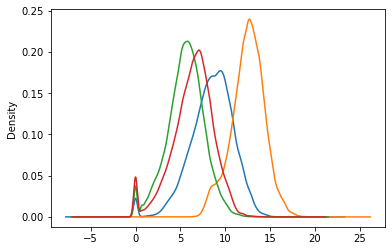

In [11]:
# Add your code here for plotting the distribution
combined_data['likes_log'].plot.kde()
combined_data['views_log'].plot.kde()
combined_data['dislikes_log'].plot.kde()
combined_data['comment_log'].plot.kde()

#### 5.2.4: Comparing views, likes, dislikes against categories (3 pt)

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

Category Name count
Entertainment      49946
Music              18007
People & Blogs     15658
News & Politics    15639
Comedy             15002
Name: category, dtype: int64


/Users/manojpawar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


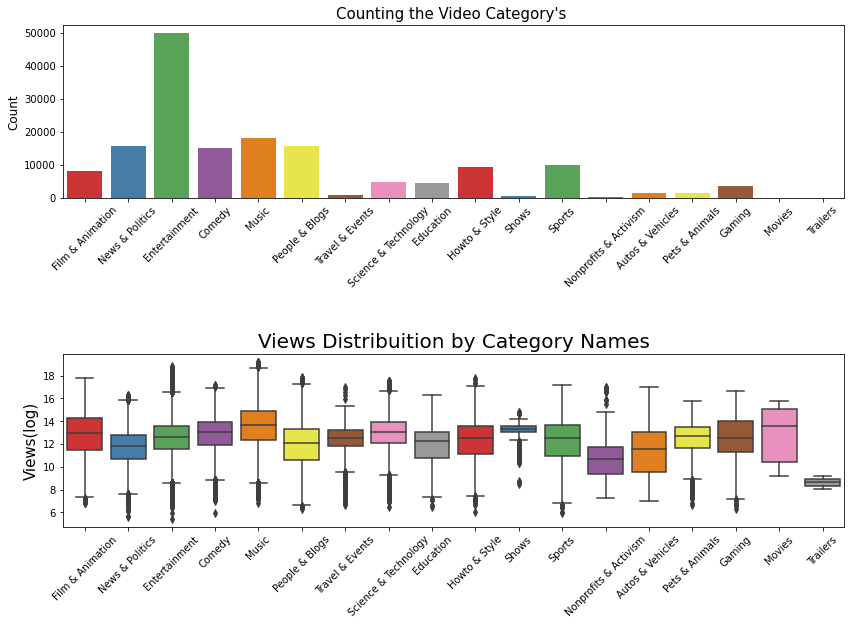

In [58]:
# Your code goes here
# Plots will be manually graded
print("Category Name count")
print(combined_data.category.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category', data=combined_data, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category', y='views_log', data=combined_data, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

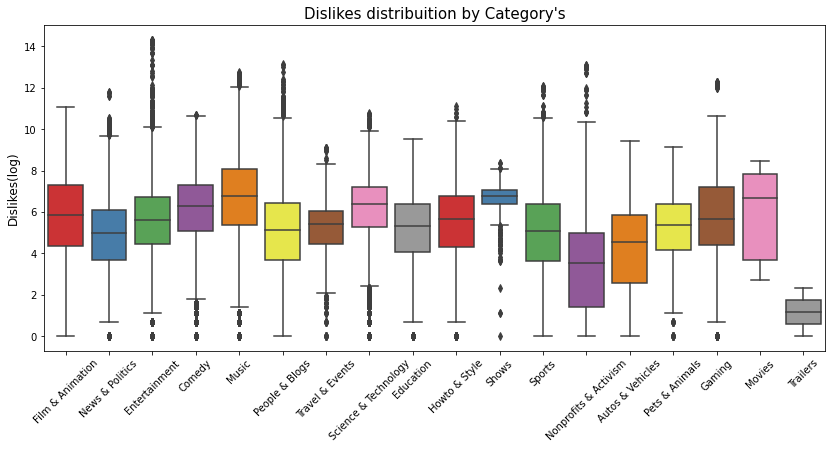

In [59]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='dislikes_log', data=combined_data, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

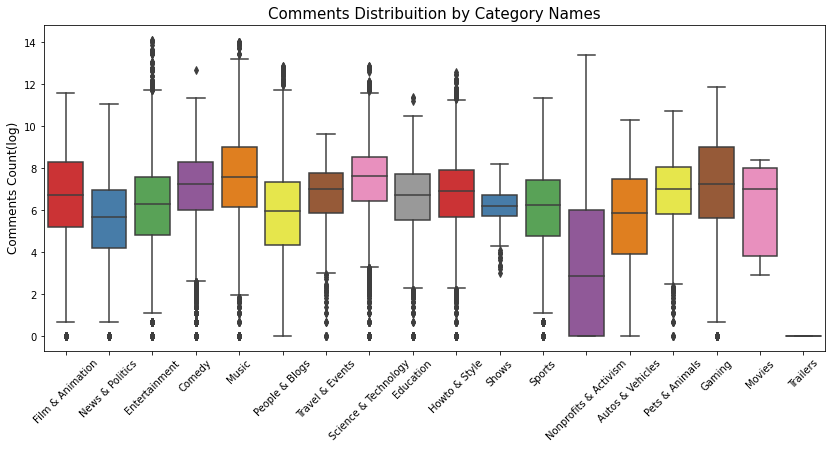

In [60]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category', y='comment_log', data=combined_data, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

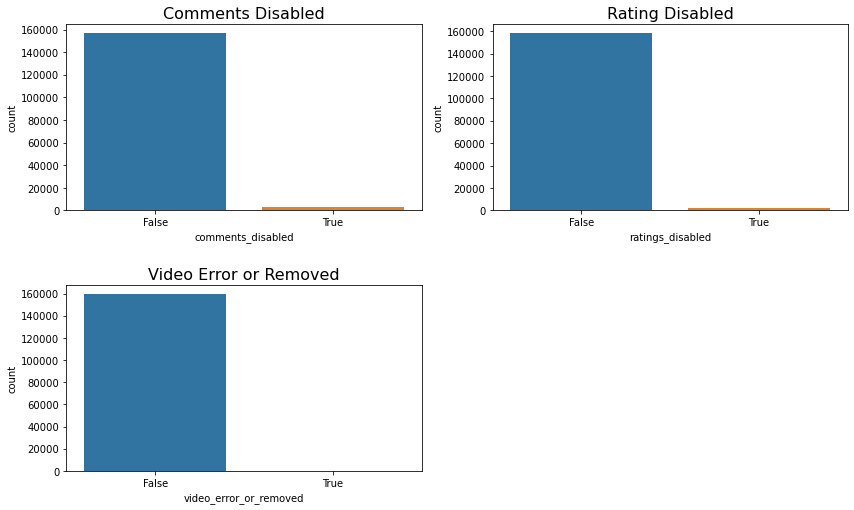

In [61]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=combined_data)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=combined_data)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=combined_data)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

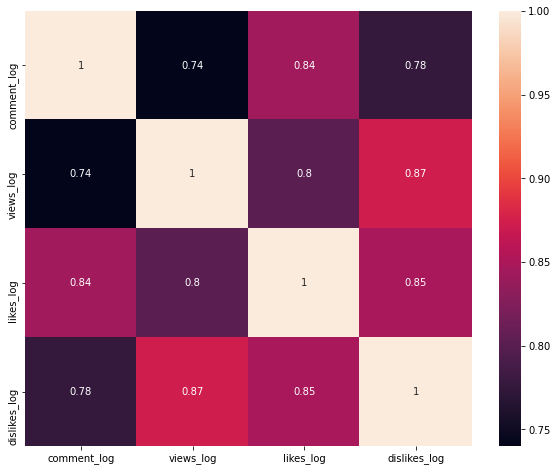

In [65]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(combined_data[['comment_log',
         'views_log','likes_log','dislikes_log', "category"]].corr(), annot=True)
plt.show()

#### 5.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [13]:
# Add your code here
def countDelimiter(x):
    return int(x.count('|'))

combined_data["num_tags"]=combined_data["tags"].apply(countDelimiter)
combined_data["num_tags"]

video_id
kzwfHumJyYc    14
zUZ1z7FwLc8    18
10L1hZ9qa58    13
N1vE8iiEg64    19
kJzGH0PVQHQ    10
               ..
BZt0qjTWNhw    13
1h7KV2sjUWY     0
D6Oy4LfoqsU    23
oV0zkMe1K8s    21
ooyjaVdt-jA     3
Name: num_tags, Length: 159906, dtype: int64

##### b. Processing description and title (2 pts.)

Calculate the length of description and title and add them as features to the dataset

In [14]:
# Add your code here
def calLength(x):
    value = str(x)
    return int(len(value)) if x is not None else 0
               
combined_data["desc_len"]=combined_data["description"].apply(calLength)
combined_data["desc_len"]

video_id
kzwfHumJyYc     920
zUZ1z7FwLc8    2232
10L1hZ9qa58     482
N1vE8iiEg64     263
kJzGH0PVQHQ     753
               ... 
BZt0qjTWNhw      46
1h7KV2sjUWY       3
D6Oy4LfoqsU     775
oV0zkMe1K8s    3268
ooyjaVdt-jA     709
Name: desc_len, Length: 159906, dtype: int64

In [15]:
# Add your code here
combined_data["len_title"]=combined_data["title"].apply(calLength)
combined_data["len_title"]

video_id
kzwfHumJyYc    81
zUZ1z7FwLc8    58
10L1hZ9qa58    58
N1vE8iiEg64    30
kJzGH0PVQHQ    88
               ..
BZt0qjTWNhw    28
1h7KV2sjUWY    26
D6Oy4LfoqsU    84
oV0zkMe1K8s    35
ooyjaVdt-jA    64
Name: len_title, Length: 159906, dtype: int64

In [16]:
# Print cell
print('check_tags_title_description',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description [count    159906.000000
mean         17.185178
std          11.988413
min           0.000000
25%           8.000000
50%          16.000000
75%          25.000000
max         123.000000
Name: num_tags, dtype: float64, count    159906.000000
mean        927.998449
std         860.416695
min           1.000000
25%         331.000000
50%         686.000000
75%        1264.000000
max        5260.000000
Name: desc_len, dtype: float64, count    159906.000000
mean         56.334428
std          22.957137
min           1.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [17]:
# Add your code here
#temp_publish_time = pd.to_datetime(combined_data['publish_time'], errors='coerce')
temp_publish_time = combined_data['publish_time'] 
combined_data['publish_date'] = temp_publish_time.dt.date
#day on which video was published
combined_data['publish_weekday']=temp_publish_time.dt.day_name()
combined_data['publish_time'] = temp_publish_time.dt.time

In [18]:
random_index = random.randint(0,combined_data.shape[0]-1)

In [19]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(13, 0, 2), datetime.date(2017, 12, 7), [19354, 19644, 22967, 23250, 23277, 24263, 27151]]


##### d. Number of videos per weekday (1 pt)

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

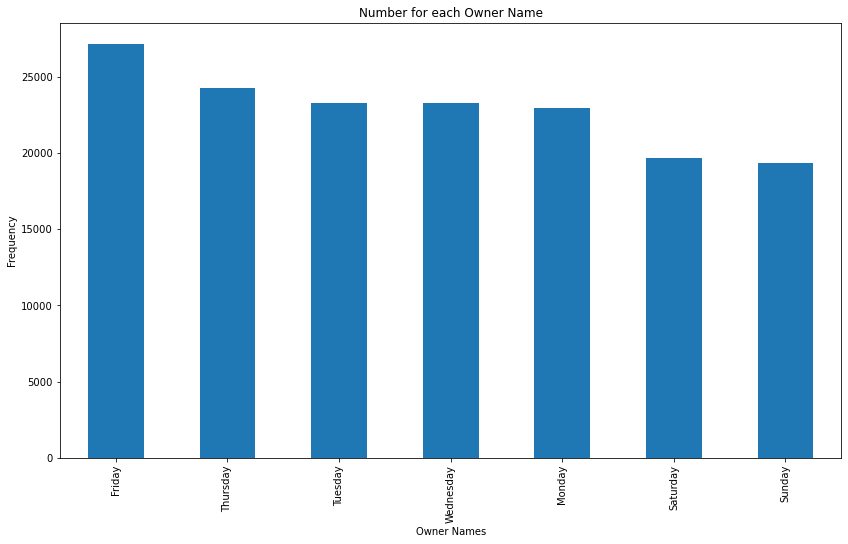

In [20]:
# Add your code for plot here
# Plots will be manually graded
# Add your code for plot here
# Plots will be manually graded
ax1 = combined_data['publish_weekday'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax1.set_xlabel("Owner Names")
ax1.set_ylabel("Frequency")
plt.show()

#### 5.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. 

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [27]:
## Add your code here
columns_to_drop = combined_data.select_dtypes(include=[np.object]).columns.tolist()
print('Columns of type object:',columns_to_drop)
if 'country' in columns_to_drop: columns_to_drop.remove('country')
if 'publish_weekday' in columns_to_drop: columns_to_drop.remove('publish_weekday')
if 'category' in columns_to_drop: columns_to_drop.remove('category')

columns_to_drop.extend(['views', 'likes', 'dislikes', 'comment_count'])
print('Final columns to remove:',columns_to_drop)
print('Column in Df before removing:',combined_data.columns.tolist())
combined_data.drop(columns_to_drop, axis='columns', inplace=True)
print(combined_data.dtypes)

Columns of type object: ['title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description', 'country', 'publish_date', 'publish_weekday']
Final columns to remove: ['title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description', 'publish_date', 'views', 'likes', 'dislikes', 'comment_count']
Column in Df before removing: ['trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'country', 'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'publish_date', 'publish_weekday']
trending_date             datetime64[ns]
category_id                        int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
country                           object
likes_log                   

#### 5.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [30]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
print(combined_data.publish_weekday.astype('category'))
print(combined_data.country.astype('category'))
print(combined_data.category.astype('category'))
# Hint: Use pd.get_dummies()range. 




video_id
kzwfHumJyYc      Sunday
zUZ1z7FwLc8      Monday
10L1hZ9qa58      Sunday
N1vE8iiEg64      Sunday
kJzGH0PVQHQ      Monday
                 ...   
BZt0qjTWNhw      Friday
1h7KV2sjUWY      Friday
D6Oy4LfoqsU      Friday
oV0zkMe1K8s    Thursday
ooyjaVdt-jA    Thursday
Name: publish_weekday, Length: 159906, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
video_id
kzwfHumJyYc    IN
zUZ1z7FwLc8    IN
10L1hZ9qa58    IN
N1vE8iiEg64    IN
kJzGH0PVQHQ    IN
               ..
BZt0qjTWNhw    US
1h7KV2sjUWY    US
D6Oy4LfoqsU    US
oV0zkMe1K8s    US
ooyjaVdt-jA    US
Name: country, Length: 159906, dtype: category
Categories (4, object): ['CA', 'FR', 'IN', 'US']


AttributeError: 'DataFrame' object has no attribute 'category'

In [ ]:
# Print cell.
print('check_final_df',(combined_data.shape))

Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [ ]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 5.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [ ]:
# Add your code here
label = 
features = 

In [ ]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

## 5.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 5.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [ ]:
from sklearn.model_selection import train_test_split
# Add your code here




In [ ]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

### 5.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code here

mse_test = 





In [ ]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_pred))))

#### 5.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
# Add your code here




##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [ ]:
# Add your code here

In [ ]:
# Print cell.
print('check_pca', (x_train[:50,:]))

### 5.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here
# Only tune the max depth of the trees in the RF hyperparameter.

# depth = []
# nEstimator = [140]


##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [ ]:
# Add your code here
# Set n_estimators = 140

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred))))

## Almost halfway there :)

Well done! Almost halfway there :)



# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [ ]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()


In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = "/content/spark-3.0.2-bin-hadoop3.2"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


### 5.1 Data Preparation for Spark ML (20 points)

Once the spark setup ready. Next, we need the prepared data for our ML algorithms. We will use the same data you processed in Section 1 but now in spark. 

Read in the csv  into a spark dataframe. Set the "inferSchema" flag to True so that the columns are the correct datatypes and not all strings. Further, set the parameter to the first row as column headers.

In [ ]:
# Add your code here

train_sdf = 

Let us make sure everything is smooth to proceed

In [ ]:
train_sdf.show()

Print out the dataframe schema and verify the datatypes

In [ ]:
#Task: Print the dataframe schema and verify
# Add your code here


Now, we have the processed data in hand. Next for the Spark ML, we need to create a feature column that has all features concatenated and a single column for labels.

You can use VectorAssembler() to create a feature vector from all categorical and numerical features. Let us call the call the final vector as “features”.

Now, list all columns in the data and store it in a list named 'all_columns'


In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [ ]:
# Add your code here
all_columns = # Task

Now create a list of columns which you don't wan't to include in your features, i.e., the labels and probably other columns which are not useful for the machine learning model. Let us call this list drop_columns.

In [ ]:
# Add your code here
drop_columns = # Task

In [ ]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Now create a VectorAssembler object with columns you want to use for the ML models. Let us Name the output column as 'features'. These are the features that you will use later.  Let us name the vector assembler object 'assembler'

In [ ]:
# Add your code


In [ ]:
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

Now, we are ready to create a pipeline with different stages.  For out data so far, we just a single stage with the assember, however, you could have other stages  before that where you perform operations on the data, e.g, transforming categorical strings to numeric values or feature scaling operations.

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [ ]:
from pyspark.ml import Pipeline

# Add your code here


In [ ]:
#Print results
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

Now that we have the required data in the right format, Let us create our train and test sets. Let us, split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [ ]:
# Add your code here


In [ ]:
#Print results here
print('check_split', (train_sdf.count(), test_sdf.count()))

### 5.2 Linear regression using Spark ML (15 points)

In this section, train s linear regression model to our data and predict the views. This prediction should be based on "Big" data tools, i.e., Spark ML's linear regression. Create a model using this library, fit the training data. 
Afterwards, print the summary stats of the model, i.e, 
- the RMSE error, R2 score and any other information you find useful. Refere the Spark ML documentation online for the implementation.

In this section, we will train the model without any regularization!

In [ ]:
from pyspark.ml.regression import LinearRegression

# Add your code here

lr_model = 

In [ ]:
trainingSum = lr_model.summary

print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)



Let us investigate that if the model actually overfits the training data. 

Predict the views for your test data (Note: it is called 'transform' in spark ml). Evaluate the performance using 'RegressionEvaluator' in the Spark ML Regression library. Name prediction column as 'prediction'.

In [ ]:
# Add your code here
predictions = 

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Task: Compute RMSr on the test set

test_rmse_orig = 

In [ ]:
#Print results here
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
print('result_lr_test', lranswer)

Next, we will implement regularization to avoid overfitting. you can try different  regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


In [ ]:
# Add your code here
# Compute predictions using each of the models
l1_predictions = 
l2_predictions = 
elastic_net_predictions = 

# Task: Calculate the root mean squared error (RMSE) on test set for each of your models

test_rmse_l1 = 
test_rmse_l2 = 
test_rmse_elastic = 


In [ ]:
# Print your results here
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

### 5.3 Random Forest Regression 10 pts)

You need an understanding of random forest and its variations,i.e., boosted trees to succeed as a data scientist. These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.



In [ ]:
from pyspark.ml.regression import RandomForestRegressor
# Add your code here
rf_model = #Task


In [ ]:
# Add code here to calculate predictions
predictions = #Task : Calculate predictions on the test set

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Add your code here to instatiate a regressionevaluator 

train_rmse_rf = #Task: Compute the training RMSE
rmse_rf = #Task: Compute RMSE using the test set

In [ ]:
#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark', answer)

### 5.4 Dimensionality Reduction using Principal Component Analysis (10pt)

The focus of this section is to utilize PCA to further reduce the dimensions of data, i.e., a lower dimensional space. After PCA perform linear regression on the new data. You can select a suitable value for the number of dimensions as calculated in previous section.

The steps are illustrated below:
1.   Initialization of PCA model
2.   Fit the PCA model using the training data
3.   Extract the PCA feature from the trained PCA model from step 2
4.   Train a linear regression model using the retreived PCA features
5.   Evaluate the trained model 's performance on the test set 

This section requires extra effort and therefore has less starter code. Spen time to understand and implement considering yourself a data scientist working on an assigned task.






In [ ]:
# Add your code for the PCA model and training here

pca_of_model = 

train_rmse_pca_model = 

In [ ]:
# Add your code here
predictions = #Task: Retreive predictions on the test set

test_rmse_pca_model = #Task: Retreive RMSE for test data

In [ ]:
# Add your code here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
print('check_pca_spark', answer)

# Submission

**Submission on the blackboard**. 
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.